In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import seaborn as sns

class ModelEstimator():
    
    original_train_data = []
    original_test_data = []
    original_y = []
    
    train_data = []
    test_data = []
    y_train = []
    y_test = []
    
    def __init__(self, data_func, models):
        self.original_train_data = pd.read_csv('train.csv')
        self.original_test_data = pd.read_csv('test.csv')
        self.original_y = self.original_train_data['Survived']
        self.data_func = data_func
        self.models_func = models
    
    def pre_test_model(self):
        for dpf in self.data_func:
            X_train, X_test, y_train, y_test = train_test_split(self.original_train_data, self.original_y, test_size=0.3, random_state=2)
            X_test = X_test.drop(columns=['Survived'])
            X, y, X_test = dpf(X_train, X_test)
            for model in self.models_func:
                print('using model ', model.__name__, ' with data ', dpf.__name__)
                y_pred = model(X, y, X_test)
                print(accuracy_score(y_test, y_pred))
                print(classification_report(y_test, y_pred)) 
                
    def predict_real_test_with_model(self, dpf, model):
        X, y, X_test = dpf(self.original_train_data, self.original_test_data)
        print('using model ', model.__name__, ' with data ', dpf.__name__)
        y_pred = model(X, y, X_test)
        
        res = self.original_test_data[['PassengerId']]
        res['Survived'] = y_pred
        
        print(res)
        
        path = './submission.csv'
        res.to_csv(path, index=False)
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


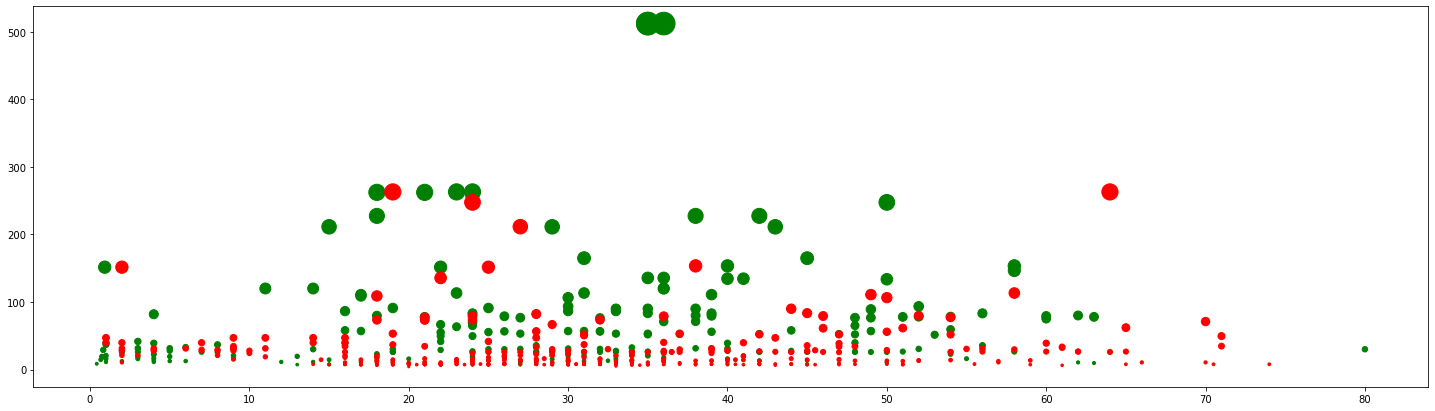

In [24]:
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
df.info()
df.describe()

plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], c='green', s=df[df['Survived'] == 1]['Fare'])
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], c='red', s=df[df['Survived'] == 0]['Fare']);

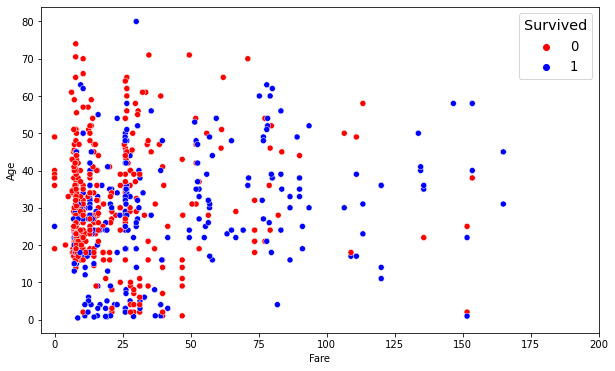

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xlim(-5,200)

with sns.plotting_context("notebook",font_scale=1.2):

    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['red','blue'],
        data=df,
        ax=ax
    )

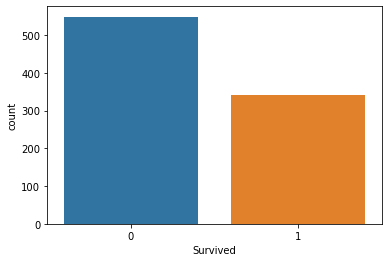

In [26]:
sns.countplot(x="Survived", data=df)
plt.show()

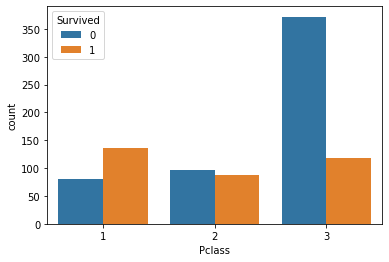

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [27]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()
print(df["Survived"].groupby(df["Pclass"]).mean())
print(df["Pclass"].value_counts())

177


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


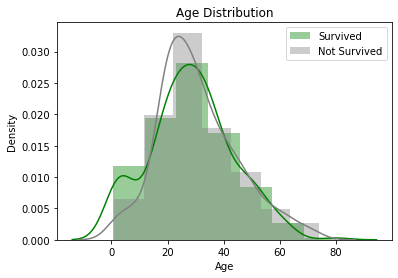

In [28]:
print(df["Age"].isnull().sum())
sns.distplot(df[df.Survived==1]["Age"],color="green", bins=7, label="Survived")
sns.distplot(df[df.Survived==0]["Age"],color="grey", bins=7, label="Not Survived")
plt.legend()
plt.title("Age Distribution")
plt.show()

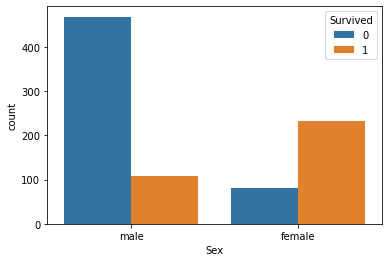

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [29]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

print(df["Survived"].groupby(df["Sex"]).mean())
print(df["Sex"].value_counts())

In [30]:
# data processing

def data_func_1(train_data, test_data):
    def check_null(x):
        # print(x, type(x))
        if x and x!=0:
            return 1
        else:
            return 0
            
    def check_cabin(data):
        data = data[['Survived', 'Cabin']]
        data = data.fillna(0)
        data['if_cabin'] = data['Cabin'].apply(check_null)
        tmp = data[data['if_cabin']==1]
        print(tmp)
        print(tmp['Survived'].sum())
        return
    
    # check_cabin(train_data)
    # a = abcde
    
    y = train_data['Survived']
    train_data = train_data.drop(columns=['Survived'])
    # print(y.head())
    # print(train_data.head())
    # print(test_data.head())
    
    
    def process_data(data):
        def process_ticket(x):
            # print(x)
            x = x.split(' ')[-1]
            try:
                x = float(x)
            except:
                x = 0.0
            return x
        
        data['Sex'] = data['Sex'].map({'male': 0, 'female':1})
        
        data['Ticket'] = data['Ticket'].apply(process_ticket)
        data['Ticket'] = (data['Ticket']+1).transform(np.log)

        data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
        data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
                                               'Sir', 'Jonkheer', 'Dona'], 'Rare')
        data['Title'] = data['Title'].replace('Mlle', 'Miss')
        data['Title'] = data['Title'].replace('Ms', 'Miss')
        data['Title'] = data['Title'].replace('Mme', 'Mrs')
        data['Title'] = data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
        data['Title'] = data['Title'].fillna(0)
        
        # data['Cabin'] = data['Cabin'].apply(check_null)
        guess_ages = np.zeros((2,3))
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = data[(data['Sex'] == i) & (data['Pclass'] == j+1)]['Age'].dropna()
                age_guess = guess_df.median()
                guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
        for i in range(0, 2):
            for j in range(0, 3):
                data.loc[(data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1), 'Age'] = guess_ages[i,j]
        data['Age'] = data['Age'].astype(int)
        data.loc[ data['Age'] <= 16, 'Age'] = 0
        data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
        data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
        data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
        data.loc[ data['Age'] > 64, 'Age'] = 4
        
        # print(data['Ticket'])
        
        data['FamilyMembers'] = data['SibSp'] + data['Parch'] + 1
        data['Alone'] = 0
        data.loc[data['FamilyMembers'] == 1, 'Alone'] = 1
        
        # a = abcde
        
        data['Age_Class'] = data.Age * data.Pclass
        
        # print(data.head())
        
        freq_port = 'S'
        data['Embarked'] = data['Embarked'].fillna(freq_port)
        data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
        
        data['Fare'].fillna(data['Fare'].dropna().median(), inplace=True)
        
        data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
        data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
        data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
        data.loc[ data['Fare'] > 31, 'Fare'] = 3
        data['Fare'] = data['Fare'].astype(int)
    
        deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
        data['Cabin'] = data['Cabin'].fillna("U0")
        data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
        data['Deck'] = data['Deck'].map(deck)
        data['Deck'] = data['Deck'].fillna(0)
        data['Deck'] = data['Deck'].astype(int)
    
        data = data.drop(columns=['Name', 'PassengerId', 'Cabin'])
        # , 'Parch', 'SibSp', 'FamilyMembers'
        data = data.fillna(0)
        
        return data
    train_data = process_data(train_data)
    test_data = process_data(test_data)
    return train_data, y, test_data

def data_func_2(train_data, test_data):
    y = train_data['Survived']
    train_data = train_data.drop(columns=['Survived'])
    
    train_data['Gender'] = pd.get_dummies(train_data['Sex'], drop_first=True)
    test_data['Gender'] = pd.get_dummies(test_data['Sex'], drop_first=True)

    train_data.drop(columns=['Sex', 'Embarked', 'Fare'], inplace=True)
    test_data.drop(columns=['Sex', 'Embarked', 'Fare'], inplace=True)
    
    _train = pd.read_csv("./titanic/train.csv")
    _test = pd.read_csv("./titanic/train.csv")
    dataset = pd.concat([_train, _test], sort=True, ignore_index=True)
    train_len = len(train_data)
    
    surname = dataset['Name'].apply(lambda x: x[:x.find(',')])
    ticket = dataset['Ticket'].apply(lambda x: x[:-1])
    dataset['PassengerGroup'] = (surname.astype(str) + '-' + dataset['Pclass'].astype(str) + '-'
           + ticket.astype(str) + '-' + dataset['Embarked'].astype(str))

    def PassengerGroup_labeler(group):
        group_elements = dataset.loc[dataset['PassengerGroup'] == group, 'PassengerId']
        if len(group_elements) == 1:
            return 0
        else:
            return group_elements.min()
    
    dataset['GroupId'] = dataset['PassengerGroup'].apply(PassengerGroup_labeler)
    dataset.drop(columns='PassengerGroup', inplace=True)
    
    dataset['InGroup'] = (dataset['GroupId'] > 0).astype(int)

    train_data['InGroup'] = dataset.iloc[:train_len, -1]
    test_data['InGroup'] = dataset.iloc[train_len:, -1].reset_index(drop=True)
    
    dataset['Title'] = dataset['Name'].apply(lambda x: x[x.find(', ') + 2:x.find('.')])

    mask = (dataset['GroupId'] != 0) & ((dataset['Title'] == 'Master') | (dataset['Sex'] == 'female'))

    fcg_groups = dataset.loc[mask, 'GroupId'].value_counts()
    fcg_groups = fcg_groups[fcg_groups > 1]

    mask = mask & (dataset['GroupId'].isin(fcg_groups.index))

    dataset['InFCG'] = 0
    dataset.loc[mask, 'InFCG'] = 1

    train_data['FCGSurvived'] = dataset.iloc[:train_len, -1]
    test_data['FCGSurvived'] = dataset.iloc[train_len:, -1].reset_index(drop=True)
    
    dataset['FCGSurvived'] = dataset.loc[dataset['InFCG'] == 1].groupby('GroupId')['Survived'].transform(np.nanmean)

    dataset.loc[dataset['FCGSurvived'].isna(), 'FCGSurvived'] = 0
    dataset['FCGSurvived'] = dataset['FCGSurvived'].astype(int)

    train_data['FCGSurvived'] = dataset.iloc[:train_len, -1]
    test_data['FCGSurvived'] = dataset.iloc[train_len:, -1].reset_index(drop=True)
    
    train_data.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age'], inplace=True)
    test_data.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age'], inplace=True)
    
    
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)
    
    return train_data, y, test_data

def data_func_3(train, test):
    y = train['Survived']
    
    combi = train.append(test)
    titles = set()
    for name in combi['Name']:
        titles.add(name.split(',')[1].split('.')[0].strip())
    title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona": "Royalty"
    }
    
    def get_titles():
        combi['Title'] = combi['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
        combi['Title'] = combi.Title.map(title_dictionary)
        return combi
    
    combi = get_titles()
    
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(random_state=42)
    date = pd.Timestamp('2200-01-01')
    
    for col in combi:
        if combi[col].dtype=="object":
            combi[col].fillna("not listed", inplace=True)
        if combi[col].dtype=="int":
            #X[col].fillna(X[col].mode()[0], inplace=True)
            combi[col].fillna(combi[col].mean(), inplace=True)
            #combi[col] = combi[col].astype.int()
        if combi[col].dtype=='float':
           #X[col].fillna(X[col].mean(), inplace=True)
           combi[col] = imp.fit_transform(combi[col].values.reshape(-1,1))
        if combi[col].dtype=="datetime64[ns]":
            combi[col].fillna(date, inplace=True)
            
    combi['Age_group'] = pd.cut(x=combi['Age'], bins=[0, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
    combi['Fare_group'] = pd.cut(x=combi['Fare'], bins=[0, 100, 400, 1000], labels=['low', 'middle', 'high'])
    
    combi['Age_group'] = combi['Age_group'].astype(str)
    combi['Fare_group'] = combi['Fare_group'].astype(str)
    
    
    from sklearn import preprocessing
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()

    for col in combi:
        if combi[col].dtype=="O":
            combi[col] = enc.fit_transform(combi[col].values.reshape(-1,1))
            
    combi = (combi - combi.min()) / (combi.max() - combi.min())

    
    features = ['Pclass', 'Sex','Title',  'Age_group','Fare_group', 'Embarked']
    
    X = combi[features][: len(train)]
    X_test = combi[features][len(train) :]
    X.shape, y.shape,X_test.shape


    return X, y, X_test

def data_func_4(train_data, test_data):
    
    complete_df = pd.concat([train_data, test_data])
    
    complete_df['Embarked'] = complete_df['Embarked'].fillna('C')
    
    complete_df['Fare'] = complete_df.groupby('Pclass')['Fare'].transform(lambda val: val.fillna(val.median()))
    
    complete_df.loc[complete_df['Sex']=='female','Age'] = complete_df[complete_df['Sex']=='female']['Age'].transform(lambda val: val.fillna(val.median()))
    complete_df.loc[complete_df['Sex']=='male', 'Age'] = complete_df[ complete_df['Sex']=='male' ]['Age'].transform(lambda val: val.fillna(val.median()))

    X = complete_df[:len(train_data)].drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'] ,axis=1)
    X = pd.get_dummies(X)
    y = complete_df[:len(train_data)]['Survived']
    X_final = complete_df[len(train_data):].drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'] ,axis=1)
    X_final = pd.get_dummies(X_final)
    
    return X, y, X_final

In [31]:
def model_1(train_data, y, vali_data):
    score=[]
    classifier = DecisionTreeClassifier()
    classifier.fit(train_data, y)
    pred = classifier.predict(vali_data)
    # print(pred)
    return pred

def model_2(train_data, y, vali_data):
    score=[]
    rf = RandomForestClassifier(n_estimators=100)
    bag_clf = BaggingClassifier(base_estimator=rf, n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(train_data, y)
    pred = bag_clf.predict(vali_data)
    # print(pred)
    return pred

def model_3(train_data, y, vali_data):
    D_train = xgb.DMatrix(train_data, label=y)
    D_test = xgb.DMatrix(vali_data)
    param = {
    'eta': 0.3, 
    'max_depth': 5,  # depth of the trees in the boosting process
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 2} # number of classes to predict

    steps = 5  # The number of training iterations
    model = xgb.train(param, D_train, steps)
    preds = model.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    # print(best_preds)
    return best_preds

def model_4(train_data, y, vali_data):
    score=[]
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train_data, y)
    pred = rf.predict(vali_data)
    # print(pred)
    return pred

def model_knn(train_data, y, vali_data):
    model = KNeighborsClassifier(leaf_size=3, weights='uniform', n_neighbors=19)
    model.fit(train_data, y)
    pred = model.predict(vali_data)
    return pred

def model_SVC(train_data, y, vali_data):
    model = SVC(C=10, gamma='scale', kernel='poly',random_state=42).fit(train_data, y)
    pred = model.predict(vali_data)
    return pred

def model_logistic(train_data, y, vali_data):
    model = LogisticRegression(C=1, max_iter=100, penalty='none', solver='newton-cg', random_state=42).fit(train_data, y)
    pred = model.predict(vali_data)
    return pred

In [32]:
data_func = [data_func_1, data_func_4]
models = [model_1, model_2, model_3, model_4, model_SVC, model_logistic]

envaluator = ModelEstimator(data_func, models)
envaluator.pre_test_model()

using model  model_1  with data  data_func_1
0.7985074626865671
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       160
           1       0.79      0.68      0.73       108

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

using model  model_2  with data  data_func_1
0.8208955223880597
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       160
           1       0.84      0.69      0.76       108

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

using model  model_3  with data  data_func_1
[17:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the 

In [33]:
envaluator.predict_real_test_with_model(data_func_4, model_2)

using model  model_2  with data  data_func_4
     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       1.0
4            896       0.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       1.0

[418 rows x 2 columns]


<ipython-input-23-9671099e9cbc>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Survived'] = y_pred
